# Download Dataset MNIST Handwritten Digits

In [1]:
!pip install kagglehub

In [ ]:
import kagglehub

path = kagglehub.dataset_download("oddrationale/mnist-in-csv")
print("Path to dataset files:", path)

100%|██████████| 15.2M/15.2M [00:03<00:00, 5.07MB/s]

Extracting files...


Path to dataset files: C:\Users\andik\.cache\kagglehub\datasets\oddrationale\mnist-in-csv\versions\2


# Import + Load Dataset

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy

In [4]:
df_train = pd.read_csv(path + "/mnist_train.csv")
df_test = pd.read_csv(path + "/mnist_test.csv")

In [5]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [11]:
X_train = df_train.iloc[:, 1:]
X_test = df_test.iloc[:, 1:]
y_train = df_train.iloc[:, 0]
y_test = df_test.iloc[:, 0]

In [14]:
# data input (X) harus dibuat dalam float dan di-normalisasi

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Build Model

In [15]:
model = Sequential()
model.add(Dense(400, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer=SGD(lr=0.001), loss=categorical_crossentropy, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               120300    
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dense_3 (Dense)             (None, 10)                3010      
                                                                 
Total params: 527,610
Trainable params: 527,610
Non-trainable params: 0
_________________________________________________________________


c:\Users\andik\anaconda3\envs\AndikaTF\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
history = model.fit(X_train, np_utils.to_categorical(y_train, 10), epochs=25, batch_size=128, validation_data=(X_test, np_utils.to_categorical(y_test, 10)))

Epoch 1/25
469/469 [==============================] - 4s 4ms/step - loss: 2.2466 - accuracy: 0.2164 - val_loss: 2.1374 - val_accuracy: 0.4012
Epoch 2/25
469/469 [==============================] - 1s 3ms/step - loss: 2.0684 - accuracy: 0.4387 - val_loss: 1.9273 - val_accuracy: 0.6040
Epoch 3/25
469/469 [==============================] - 1s 3ms/step - loss: 1.8423 - accuracy: 0.5855 - val_loss: 1.6460 - val_accuracy: 0.6800
Epoch 4/25
469/469 [==============================] - 1s 3ms/step - loss: 1.5526 - accuracy: 0.6681 - val_loss: 1.3190 - val_accuracy: 0.7442
Epoch 5/25
469/469 [==============================] - 1s 3ms/step - loss: 1.2521 - accuracy: 0.7286 - val_loss: 1.0313 - val_accuracy: 0.7894
Epoch 6/25
469/469 [==============================] - 1s 3ms/step - loss: 1.0108 - accuracy: 0.7710 - val_loss: 0.8303 - val_accuracy: 0.8233
Epoch 7/25
469/469 [==============================] - 1s 3ms/step - loss: 0.8480 - accuracy: 0.7967 - val_loss: 0.7006 - val_accuracy: 0.8422
Epoch 

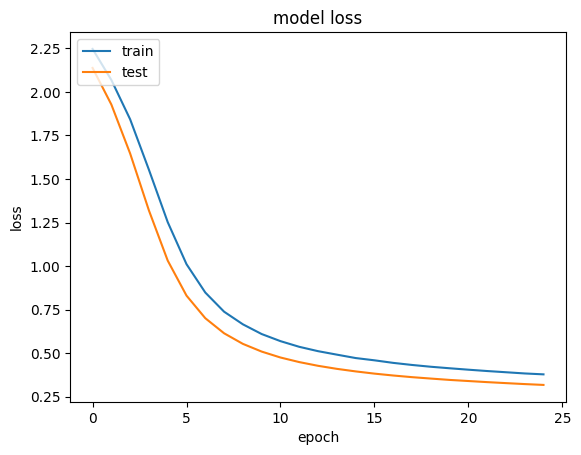

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

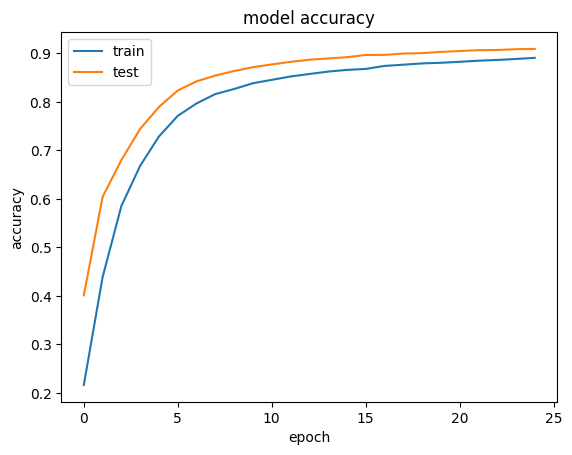

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
model.evaluate(X_test, np_utils.to_categorical(y_test, 10))

313/313 [==============================] - 1s 3ms/step - loss: 0.3176 - accuracy: 0.9090


[0.31764471530914307, 0.9089999794960022]